In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

We will import more libraries/dependencies as per needed further in the code

In [2]:
park = pd.read_csv(r"C:\Users\krish\OneDrive\Desktop\Parkinson's\parkinson_data.csv")
park.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


## Important Parameters in our Dataset

Jitter:

Definition: Jitter is a measure of the frequency variation in consecutive periods of a sound waveform.
In the Dataset: The dataset includes several jitter-related features, such as Jitter(%), Jitter(Abs), Jitter:RAP (Relative Average Perturbation), Jitter:PPQ5 (Five-Point Period Perturbation Quotient), and Jitter:DDP (Jitter:RAP * 3).

Shimmer:

Definition: Shimmer is a measure of the amplitude variation in consecutive periods of a sound waveform.
In the Dataset: The dataset includes several shimmer-related features, such as Shimmer, Shimmer(dB) (Shimmer in decibels), Shimmer:APQ3 (Amplitude Perturbation Quotient, three-point), Shimmer:APQ5 (Amplitude Perturbation Quotient, five-point), Shimmer:APQ11 (Amplitude Perturbation Quotient, eleven-point), and Shimmer:DDA (Shimmer:APQ11 * 3)

Total UPDRS (Unified Parkinson's Disease Rating Scale):

Definition: The UPDRS is a widely used rating scale that assesses the severity of Parkinson's disease. The total UPDRS is the sum of scores from various sections of the UPDRS, including assessments of mentation, behavior, mood, activities of daily living, and motor function.
In the Dataset: The dataset includes a column named "total_UPDRS," which represents the total UPDRS score for each individual.
Motor UPDRS (Motor Section of UPDRS):

Definition: The motor section of the UPDRS specifically focuses on evaluating motor symptoms associated with Parkinson's disease, including tremors, rigidity, bradykinesia, and posture instability.
In the Dataset: The dataset includes a column named "motor_UPDRS," which represents the score related to the motor symptoms in the UPDRS for each individual.

In [3]:
park['age'].value_counts().unique

<bound method Series.unique of age
58    429
66    422
65    407
73    385
57    385
68    317
72    310
59    299
75    286
67    283
74    271
55    267
49    256
62    236
78    168
71    165
63    156
60    156
61    150
76    144
85    142
56    140
36    101
Name: count, dtype: int64>

In [4]:
park.shape

(5875, 22)

In [5]:
park.isna().sum()

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

In [6]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [7]:
# park['status'].value_counts()

In [8]:
# X = park.drop(columns = ['status', 'name'])

In [9]:
# X = park.drop('status', 'name', axis=1)
# Y = park['status']

<Axes: xlabel='Jitter(%)', ylabel='Shimmer'>

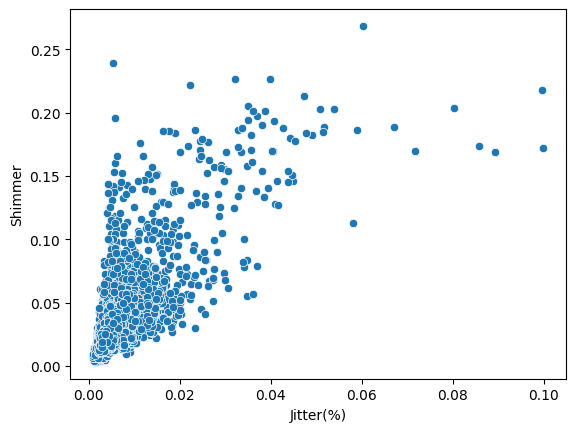

In [10]:
import seaborn as sns

sns.scatterplot(data=park, x='Jitter(%)', y='Shimmer')

In [11]:
# sns.scatterplot(data = park, x = 'subject#', y = 'combined_UPDRS')

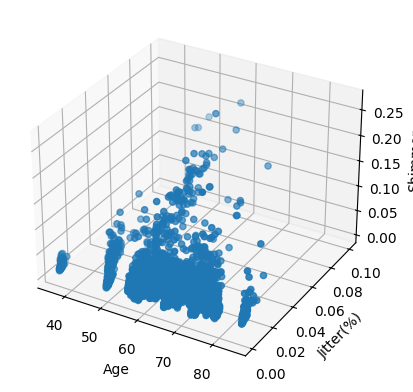

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(park['age'], park['Jitter(%)'], park['Shimmer'])

ax.set_xlabel('Age')
ax.set_ylabel('Jitter(%)')
ax.set_zlabel('Shimmer')

plt.show()

<Axes: xlabel='sex', ylabel='Jitter(%)'>

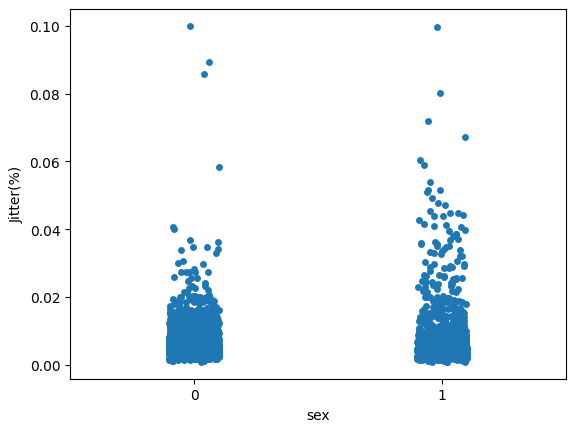

In [13]:
sns.stripplot(data = park, x = 'sex', y = 'Jitter(%)')

<Axes: xlabel='age', ylabel='Jitter(%)'>

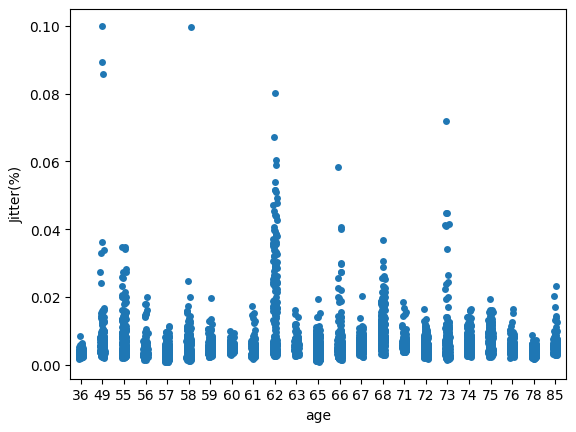

In [14]:
sns.stripplot(data = park, x = 'age', y = 'Jitter(%)')

<Axes: xlabel='sex', ylabel='age'>

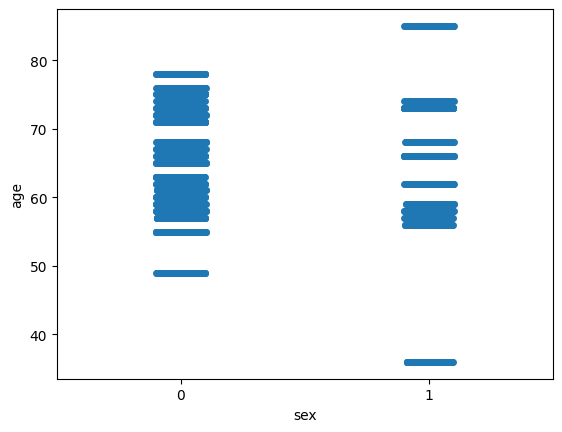

In [15]:
sns.stripplot(data  =park, x = 'sex', y = 'age')

Below is the pairplot between age, sex, motor_UPDRS and total_UPDRS

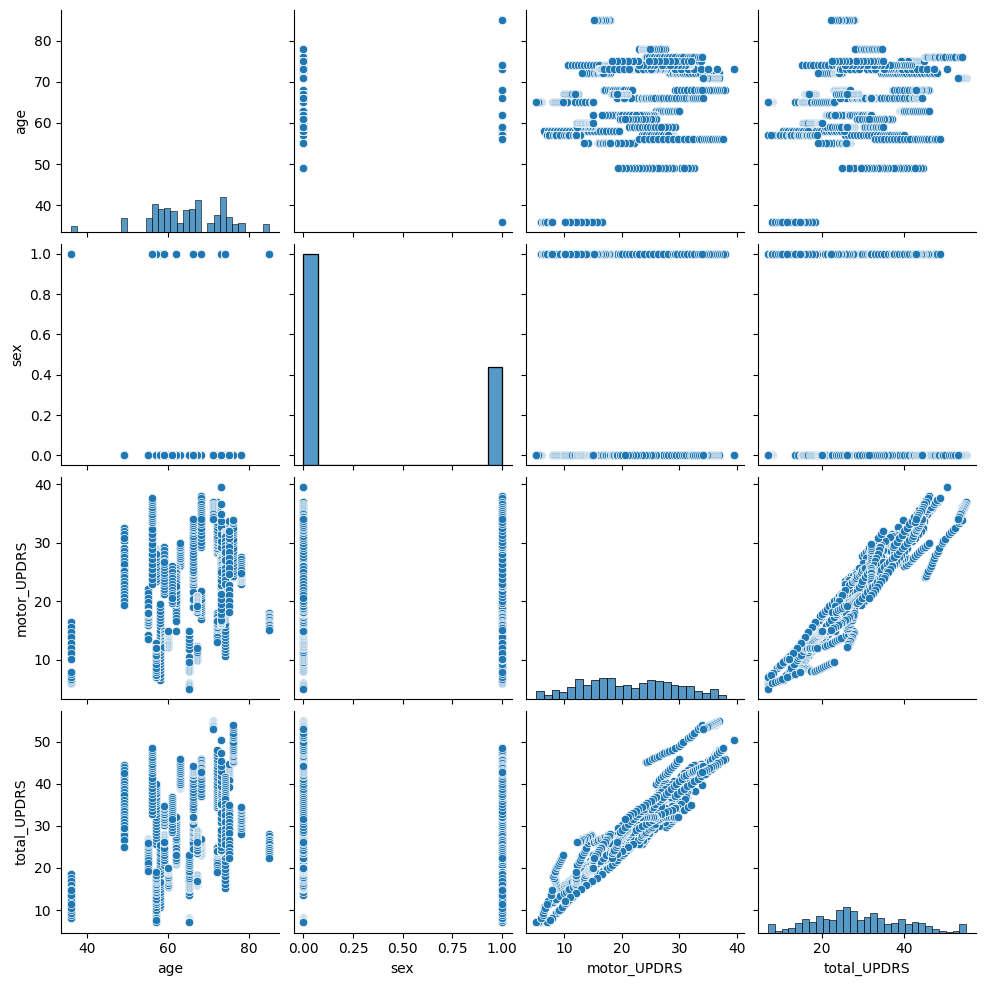

In [16]:
sns.pairplot(park[['age', 'sex', 'motor_UPDRS', 'total_UPDRS']])
plt.show()

## Correlation

Here we visualize the correalation between different variable

In [17]:
corr = park.corr()

corr

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,1.000000,-0.030864,0.286851,-0.000882,0.252919,0.253643,0.135448,0.075156,0.120339,0.136474,...,0.142864,0.112950,0.138264,0.173333,0.112949,0.168743,-0.206929,0.147300,0.097464,0.157559
age,-0.030864,1.000000,-0.041602,0.019884,0.273665,0.310290,0.023071,0.035691,0.010255,0.013199,...,0.111130,0.098912,0.089983,0.135238,0.098913,0.007093,-0.104842,0.090208,-0.092870,0.120790
sex,0.286851,-0.041602,1.000000,-0.009805,-0.031205,-0.096559,0.051422,-0.154645,0.076718,0.087995,...,0.056481,0.044937,0.064819,0.023360,0.044938,0.168170,-0.000167,-0.159262,-0.165113,-0.099901
test_time,-0.000882,0.019884,-0.009805,1.000000,0.067918,0.075263,-0.022837,-0.011365,-0.028888,-0.023290,...,-0.030962,-0.029020,-0.036504,-0.039110,-0.029017,-0.026357,0.036545,-0.038887,0.019261,-0.000563
motor_UPDRS,0.252919,0.273665,-0.031205,0.067918,1.000000,0.947231,0.084816,0.050903,0.072684,0.076291,...,0.110076,0.084261,0.092105,0.136560,0.084260,0.074967,-0.157029,0.128607,-0.116242,0.162433
total_UPDRS,0.253643,0.310290,-0.096559,0.075263,0.947231,1.000000,0.074247,0.066927,0.064015,0.063352,...,0.098790,0.079363,0.083467,0.120838,0.079363,0.060952,-0.162117,0.156897,-0.113475,0.156195
Jitter(%),0.135448,0.023071,0.051422,-0.022837,0.084816,0.074247,1.000000,0.865577,0.984181,0.968214,...,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849
Jitter(Abs),0.075156,0.035691,-0.154645,-0.011365,0.050903,0.066927,0.865577,1.000000,0.844626,0.790538,...,0.655871,0.623830,0.621401,0.589998,0.623827,0.699960,-0.706418,0.547100,0.352264,0.787853
Jitter:RAP,0.120339,0.010255,0.076718,-0.028888,0.072684,0.064015,0.984181,0.844626,1.000000,0.947196,...,0.685551,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652
Jitter:PPQ5,0.136474,0.013199,0.087995,-0.023290,0.076291,0.063352,0.968214,0.790538,0.947196,1.000000,...,0.734591,0.676711,0.734021,0.668413,0.676710,0.864864,-0.662409,0.381503,0.175359,0.663491


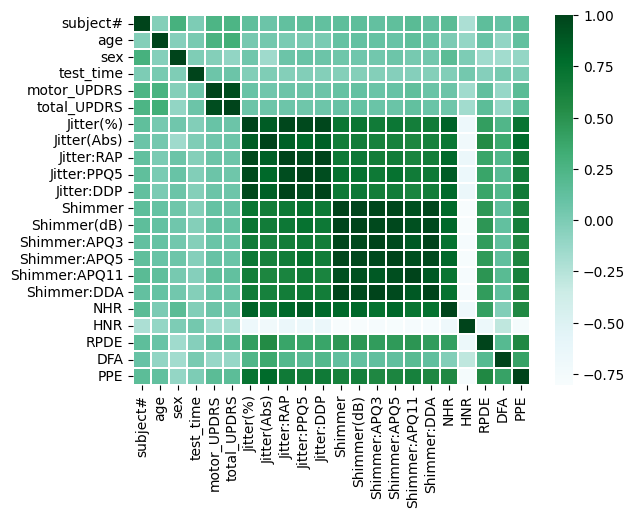

In [18]:
cmap = sns.color_palette("BuGn", as_cmap=True)
# cmap = cmap.reversed()
sns.heatmap(corr, fmt = ".2f", linewidth = 0.1, cmap=cmap)
plt.show()

We can see that all the jitter variables highly correlate with Shimmer variables.

Since the correlation between out two target variables, total_UPDRS and motor_UPDRS is very high, we can combine them into one, using feature enggineering, as follows:

In [19]:
park['combined_UPDRS'] = (park['total_UPDRS']+park['motor_UPDRS'])/2
park = park.drop(columns = ['total_UPDRS', 'motor_UPDRS'])

park.head(100)

,subject#,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,combined_UPDRS
0,1,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,...,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,31.2985
1,1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,...,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,31.6705
2,1,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,...,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,32.0420
3,1,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,...,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,32.3575
4,1,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,...,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,32.7810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,72,0,152.6400,0.00493,0.000027,0.00196,0.00237,0.00588,0.01735,...,0.00843,0.01012,0.01403,0.02528,0.023882,24.519,0.51510,0.54723,0.21213,40.7615
96,1,72,0,159.6400,0.00296,0.000018,0.00086,0.00120,0.00259,0.02135,...,0.00889,0.01143,0.01986,0.02668,0.005710,25.696,0.52484,0.57219,0.15257,41.3055
97,1,72,0,166.6400,0.00285,0.000016,0.00113,0.00141,0.00339,0.01432,...,0.00764,0.00850,0.01222,0.02291,0.004805,26.264,0.42922,0.54986,0.15523,41.8500
98,1,72,0,174.6600,0.00547,0.000024,0.00234,0.00268,0.00701,0.01991,...,0.00912,0.00969,0.01333,0.02735,0.017361,24.543,0.52026,0.53879,0.29135,42.4740


<Axes: xlabel='age', ylabel='combined_UPDRS'>

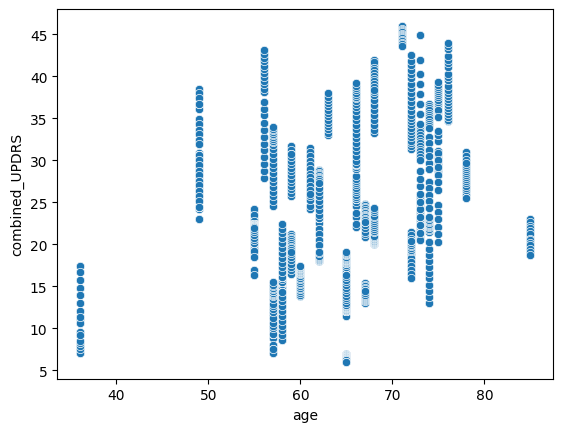

In [20]:
sns.scatterplot(data = park, x = 'age', y = 'combined_UPDRS')

In [21]:
Y = park['combined_UPDRS']
X = park.drop(columns  = ['combined_UPDRS', 'subject#'])

## PCA (Principal Component Analysis)

PCA reduces the number of variables of a data set, while preserving as much information as possible

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90) #0.90 means I'm asking PCA to give me 90% of the information, i don't care how many PCs you have, just retain 90% of information.
# Fit and transform your data
X_pca = pca.fit_transform(X)
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)



Explained variance ratio: [0.96732889]


In [23]:
X.shape

(5875, 19)

In [24]:
X_pca.shape

(5875, 1)

As we see, PCA reduced our dataset with 15 features to just 1 feature.
This might not be very beneficial, beacause PCA is used for dimensionality reduction, and 15 features is not a big dimension.
So, we will avoid PCA as for now.

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)


## Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [27]:
print("MSE_LR = ",mean_squared_error(Y_test, lr.predict(X_test)))
print("RMSE_LR = ",np.sqrt(mean_squared_error(Y_test, lr.predict(X_test))))
print("MAE_LR = ",mean_absolute_error(Y_test, lr.predict(X_test)))
print("R2_LR = ",r2_score(Y_test, lr.predict(X_test)))


MSE_LR =  70.6073359455131
RMSE_LR =  8.402817143405722
MAE_LR =  7.019038615554898
R2_LR =  0.1684497596409288


## Elastic Net Regressor

In [28]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(X_train,Y_train)

ElasticNet()

In [29]:
print("MSE_EN = ",mean_squared_error(Y_test, en.predict(X_test)))
print("RMSE_EN = ",np.sqrt(mean_squared_error(Y_test, en.predict(X_test))))
print("MAE_EN = ",mean_absolute_error(Y_test, en.predict(X_test)))
print("R2_EN = ",r2_score(Y_test, en.predict(X_test)))

MSE_EN =  75.40984564673356
RMSE_EN =  8.68388424881018
MAE_EN =  7.386348448565772
R2_EN =  0.1118900829033953


R2 score for Elastic Net is closer to 0, and mean absolute and mean squared, both error are also considerably higher for elastic net.

In conclusion, Elastic Net is not a good measure for our dataset

## Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)

RandomForestRegressor()

In [31]:
print("MSE_RFR = ",mean_squared_error(Y_test, rfr.predict(X_test)))
print("RMSE_RFR = ",np.sqrt(mean_squared_error(Y_test, rfr.predict(X_test))))
print("MAE_RFR = ",mean_absolute_error(Y_test, rfr.predict(X_test)))
print("R2_RFR = ",r2_score(Y_test, rfr.predict(X_test)))

MSE_RFR =  2.2621410959440977
RMSE_RFR =  1.5040415871724084
MAE_RFR =  0.7211425638116845
R2_RFR =  0.9733585193823194


R² measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R² indicates a better fit.

R² closer to 1 indicates  good fit, meaning the model is able to explain the variance better.

## Metrics


Before combining all jitter variables:

MSE_LR =  70.60733594551309
RMSE_LR =  8.402817143405722
MAE_LR =  7.019038615554898
R2_LR =  0.1684497596409289

MSE_EN =  75.40984564673356
RMSE_EN =  8.68388424881018
MAE_EN =  7.386348448565772
R2_EN =  0.1118900829033953

MSE_RFR =  2.1071390993467753
RMSE_RFR =  1.4515988079861375
MAE_RFR =  0.6778182274532043
R2_RFR =  0.9751839946789105

After combining all jitter variables, LR and EN metrics remain same, but RFR metrics worsen slightly, so we will avoid taking average of all jitter variables and combing them into one

MSE_LR =  70.60733594551309
RMSE_LR =  8.402817143405722
MAE_LR =  7.019038615554898
R2_LR =  0.1684497596409289

MSE_EN =  75.40984564673356
RMSE_EN =  8.68388424881018
MAE_EN =  7.386348448565772
R2_EN =  0.1118900829033953

MSE_RFR =  2.941390993467753
RMSE_RFR =  1.7415988079861375
MAE_RFR =  0.7078182274532043
R2_RFR =  0.9621839946789105

After using PCA, and using X_pca for training our data, the metrics come out to be:

MSE_LR =  84.40199403224499
RMSE_LR =  9.187055786934408
MAE_LR =  7.7413866338340735
R2_LR =  0.005988577752617408

MSE_EN =  84.40313712026162
RMSE_EN =  9.18711799860335
MAE_EN =  7.740798931123667
R2_EN =  0.0059751154812789364

MSE_RFR =  13.392135907713705
RMSE_RFR =  3.659526732750248
MAE_RFR =  1.5755579988655728
R2_RFR =  0.8422793653966156

In [32]:
print(Y.shape)
print(X.shape)

(5875,)
(5875, 19)


In [33]:
importances = rfr.feature_importances_
importances

array([0.65628174, 0.07751295, 0.07039713, 0.00286117, 0.0210175 ,
       0.00275881, 0.00319958, 0.0034132 , 0.00391078, 0.00525282,
       0.00387616, 0.00644726, 0.00531308, 0.00506499, 0.00772962,
       0.01435507, 0.01020609, 0.088557  , 0.01184507])

In [34]:
importances.shape

(19,)

In [35]:
feature_importances = pd.DataFrame({'Features': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)
print(feature_importances)


         Features  Importance
0             age    0.656282
17            DFA    0.088557
1             sex    0.077513
2       test_time    0.070397
4     Jitter(Abs)    0.021017
15            HNR    0.014355
18            PPE    0.011845
16           RPDE    0.010206
14            NHR    0.007730
11   Shimmer:APQ5    0.006447
12  Shimmer:APQ11    0.005313
9     Shimmer(dB)    0.005253
13    Shimmer:DDA    0.005065
8         Shimmer    0.003911
10   Shimmer:APQ3    0.003876
7      Jitter:DDP    0.003413
6     Jitter:PPQ5    0.003200
3       Jitter(%)    0.002861
5      Jitter:RAP    0.002759


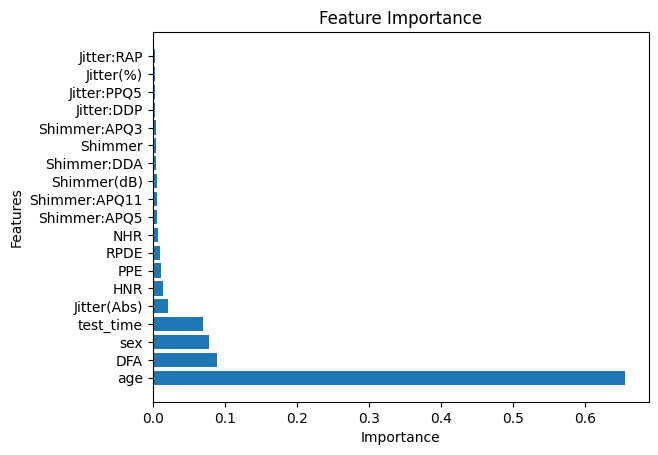

In [36]:
plt.barh(feature_importances['Features'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

As we can seee from the above graph, in the given dataset, the feature with highest importance is age. Actually it makes sense too, since it's true that PD is more commonly diagnosed in older individuals

In [37]:
# Identify the most important features
top_features = feature_importances.head(5)['Features'].tolist()

# Select only the top features for modeling
X_top_features = X[top_features]

# Retrain the model using only the top features
X_train_top, X_test_top, Y_train, Y_test = train_test_split(X_top_features, Y, test_size=0.3, random_state=42)

rfr_top = RandomForestRegressor()
rfr_top.fit(X_train_top, Y_train)

# Evaluate the model with top features
print("MSE_RFR_TopFeatures = ", mean_squared_error(Y_test, rfr_top.predict(X_test_top)))
print("RMSE_RFR_TopFeatures = ", np.sqrt(mean_squared_error(Y_test, rfr_top.predict(X_test_top))))
print("MAE_RFR_TopFeatures = ", mean_absolute_error(Y_test, rfr_top.predict(X_test_top)))
print("R2_RFR_TopFeatures = ", r2_score(Y_test, rfr_top.predict(X_test_top)))



MSE_RFR_TopFeatures =  1.5951238996488701
RMSE_RFR_TopFeatures =  1.262982145419669
MAE_RFR_TopFeatures =  0.45599209387407774
R2_RFR_TopFeatures =  0.9812140531236144


Before using feature importance:

MSE_RFR =  2.1071390993467753
RMSE_RFR =  1.4515988079861375
MAE_RFR =  0.6778182274532043
R2_RFR =  0.9751839946789105

After using feature importance with top 5 features:

MSE_RFR_TopFeatures =  1.6492246470676404
RMSE_RFR_TopFeatures =  1.2842214166831358
MAE_RFR_TopFeatures =  0.46437770476460627
R2_RFR_TopFeatures =  0.9805769027635669

If we use 4, or 6 top features, our accuracy decreases, so the best parameter is 5

In [38]:
import pandas as pd
from tabulate import tabulate

# Metrics before combining UPDRS scores
scenario_names_before_combining = ['Linear Regression', 'Elastic Net', 'Random Forest']
mse_before_combining = [70.61, 75.41, 2.11]
rmse_before_combining = [8.40, 8.68, 1.45]
mae_before_combining = [7.02, 7.39, 0.68]
r2_before_combining = [0.17, 0.11, 0.98]

# Metrics after combining UPDRS scores
scenario_names_after_combining = ['Linear Regression', 'Elastic Net', 'Random Forest']
mse_after_combining = [70.61, 75.41, 2.94]
rmse_after_combining = [8.40, 8.68, 1.74]
mae_after_combining = [7.02, 7.39, 0.71]
r2_after_combining = [0.17, 0.11, 0.96]

# Metrics after using PCA
scenario_names_after_pca = ['Linear Regression', 'Elastic Net', 'Random Forest']
mse_after_pca = [84.40, 84.40, 13.39]
rmse_after_pca = [9.19, 9.19, 3.66]
mae_after_pca = [7.74, 7.74, 1.58]
r2_after_pca = [0.01, 0.01, 0.84]

# Metrics after using Feature Importance
scenario_names_after_feature_importance = ['Random Forest (All Features)', 'Random Forest (Top 5 Features)']
mse_after_feature_importance = [2.94, 1.65]
rmse_after_feature_importance = [1.74, 1.28]
mae_after_feature_importance = [0.71, 0.46]
r2_after_feature_importance = [0.96, 0.98]

# Create DataFrames
df_before_combining = pd.DataFrame({
    'Scenario': scenario_names_before_combining,
    'MSE': mse_before_combining,
    'RMSE': rmse_before_combining,
    'MAE': mae_before_combining,
    'R2': r2_before_combining
})

df_after_combining = pd.DataFrame({
    'Scenario': scenario_names_after_combining,
    'MSE': mse_after_combining,
    'RMSE': rmse_after_combining,
    'MAE': mae_after_combining,
    'R2': r2_after_combining
})

df_after_pca = pd.DataFrame({
    'Scenario': scenario_names_after_pca,
    'MSE': mse_after_pca,
    'RMSE': rmse_after_pca,
    'MAE': mae_after_pca,
    'R2': r2_after_pca
})

df_after_feature_importance = pd.DataFrame({
    'Scenario': scenario_names_after_feature_importance,
    'MSE': mse_after_feature_importance,
    'RMSE': rmse_after_feature_importance,
    'MAE': mae_after_feature_importance,
    'R2': r2_after_feature_importance
})

# Display the tables
print("Metrics Before Combining UPDRS Scores:")
print(tabulate(df_before_combining, headers='keys', tablefmt='pretty', showindex=False))

print("\nMetrics After Combining UPDRS Scores:")
print(tabulate(df_after_combining, headers='keys', tablefmt='pretty', showindex=False))

print("\nMetrics After Using PCA:")
print(tabulate(df_after_pca, headers='keys', tablefmt='pretty', showindex=False))

print("\nMetrics After Using Feature Importance:")
print(tabulate(df_after_feature_importance, headers='keys', tablefmt='pretty', showindex=False))


Metrics Before Combining UPDRS Scores:
+-------------------+-------+------+------+------+
|     Scenario      |  MSE  | RMSE | MAE  |  R2  |
+-------------------+-------+------+------+------+
| Linear Regression | 70.61 | 8.4  | 7.02 | 0.17 |
|    Elastic Net    | 75.41 | 8.68 | 7.39 | 0.11 |
|   Random Forest   | 2.11  | 1.45 | 0.68 | 0.98 |
+-------------------+-------+------+------+------+

Metrics After Combining UPDRS Scores:
+-------------------+-------+------+------+------+
|     Scenario      |  MSE  | RMSE | MAE  |  R2  |
+-------------------+-------+------+------+------+
| Linear Regression | 70.61 | 8.4  | 7.02 | 0.17 |
|    Elastic Net    | 75.41 | 8.68 | 7.39 | 0.11 |
|   Random Forest   | 2.94  | 1.74 | 0.71 | 0.96 |
+-------------------+-------+------+------+------+

Metrics After Using PCA:
+-------------------+-------+------+------+------+
|     Scenario      |  MSE  | RMSE | MAE  |  R2  |
+-------------------+-------+------+------+------+
| Linear Regression | 84.4  |

## Observations


PCA (Principal Component Analysis):

I observed that applying PCA to reduce the dimensionality from 15 features to 1 might not be very beneficial. It seems that PCA is more effective when dealing with a larger number of features.


Combining UPDRS Scores:

I decided to combine "total_UPDRS" and "motor_UPDRS" into "combined_UPDRS" as a feature engineering step. This simplifies the target variable for regression modeling.


Model Evaluation:

I used evaluation metrics (MSE, RMSE, MAE, R2) to gain insights into the performance of different regression models, such as Linear Regression, Elastic Net, and Random Forest. Random Forest Regression appeared to perform well, especially based on the R2 score.


Feature Importance:

Analyzing feature importance, particularly the bar chart, helped me identify the features that contribute the most to the model's predictions. Age stood out as the most important feature, aligning with the understanding that Parkinson's disease is more common in older individuals.

## Best performing scenario till now: Random Forest Regressor, after applying Feature Importance


Visualization:

I created scatter plots, strip plots, and pair plots to visually represent relationships between different variables. These visualizations are crucial for my understanding of the patterns in the data.


Decision Tree Visualization:

Visualizing decision trees from the random forest models provided insights into how the model makes predictions. This was helpful for interpretability.


Model Comparison:

I compared the performance of Linear Regression, Elastic Net, and Random Forest Regression. It's important to consider the trade-offs between model complexity and performance.


Avoiding Feature Combination:

I chose not to combine all jitter variables into one, considering the slight degradation in the performance of the Random Forest Regressor.

In [39]:
from sklearn.tree import export_graphviz
from IPython.core.display import Image
import graphviz
# Export the first three decision trees from the forest

for i in range(3):
    tree = rfr.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=4, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH